For evaluating mosaic virus infection levels in cucumber leaves, as a faster alternative to existing visual examination methods

1) Implementing colorspace transformations RGB to HSV

2) arithmetic operations after masking the "diseased sections that are identified as a particular region of the leaf with a different range of hue, saturation values

In [1]:
import cv2
import numpy as np
import cv2
from matplotlib import pyplot as plt

import pylab as pl
from matplotlib.colors import hsv_to_rgb

import matplotlib

import os

In [2]:
def img2rgb(img_input):
    img_output = cv2.cvtColor(img_input,cv2.COLOR_BGR2RGB)
    return(img_output)

In [3]:
h_low_g = []
h_high_g = []

s_low_g = []
s_high_g = []

v_low_g = []
v_high_g = []

In [4]:
folder = '/Users/praneeth/Downloads/Image Processing/Leaf_Ranking/Leaf_images/samplespace_healthy'

In [5]:
list_of_files = os.listdir(folder)

In [6]:
index = 0

In [7]:
for filename in list_of_files:
    
    index = index + 1
    imgFile = os.path.join(folder,filename)

    
    img_orig = cv2.imread(imgFile)
    img = img_orig.copy()
    blur_img = cv2.blur(img,(25,25))  
    blur_img_hsv = cv2.cvtColor(blur_img, cv2.COLOR_BGR2HSV)

    # define range of green color in HSV

    sensitivity = 25;
    lower_green = np.array([60 - sensitivity, 100, 50] )
    upper_green= np.array([60 + sensitivity, 255, 255] )

    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(blur_img_hsv, lower_green, upper_green)

    # Bitwise-AND mask and original image
    masked_blur_img = cv2.bitwise_and(blur_img,blur_img, mask= mask)

    masked_blur_img_hsv = cv2.cvtColor(masked_blur_img, cv2.COLOR_BGR2HSV)

    d = masked_blur_img_hsv.shape[0]*masked_blur_img_hsv.shape[1]

    masked_blur_img_hsv_flatten = masked_blur_img_hsv.reshape(d,masked_blur_img_hsv.shape[2])

    final_hues_with0 = np.squeeze(masked_blur_img_hsv_flatten[:,0].reshape(-1,1))
    final_hues_without0 = final_hues_with0[final_hues_with0!=0]

    final_saturation_with0= np.squeeze(masked_blur_img_hsv_flatten[:,1].reshape(-1,1))
    final_saturation_without0 = final_saturation_with0[final_saturation_with0!=0]

    final_value_with0 = np.squeeze(masked_blur_img_hsv_flatten[:,2].reshape(-1,1))
    final_value_without0 = final_value_with0[final_value_with0!=0]

    img_hue_mean = np.mean(final_hues_without0)
    img_hue_sdev = np.std(final_hues_without0)
    hmean = np.int8(img_hue_mean.round())
    hsdev = np.int8(img_hue_sdev.round())
    h_low = hmean - (3*hsdev)
    h_high = hmean + (3*hsdev)

    img_saturation_mean = np.mean(final_saturation_without0)
    img_saturation_sdev = np.std(final_saturation_without0)
    smean = np.int32(img_saturation_mean.round())
    ssdev = np.int8(img_saturation_sdev.round())
    s_low = smean - (3*ssdev)
    s_high = smean + (3*ssdev)

    img_value_mean = np.mean(final_value_without0)
    img_value_sdev = np.std(final_value_without0)
    vmean = np.int32(img_value_mean.round())
    vsdev = np.int8(img_value_sdev.round())
    v_low = vmean - (3*vsdev)
    v_high = vmean + (3*vsdev)
    
    h_low_g.append(h_low)
    h_high_g.append(h_high)
    
    s_low_g.append(s_low)
    s_high_g.append(s_high)

    v_low_g.append(v_low)
    v_high_g.append(v_high)



In [8]:
hmin = min(h_low_g)
hmax = max(h_high_g)

smin = min(s_low_g)
smax = max(s_high_g)

vmin = min(v_low_g)
vmax = max(v_high_g)

In [9]:
imgFile = '/Users/praneeth/Downloads/Image Processing/Leaf_Ranking/Leaf_images/samplespace_diseased/no_3_3.png'

In [10]:
img_orig = cv2.imread(imgFile)
img = img_orig.copy()
blur_img = img
#blur_img = cv2.blur(img,(25,25))  
blur_img_hsv = cv2.cvtColor(blur_img, cv2.COLOR_BGR2HSV)

# define range of green color in HSV

sensitivity = 30;
lower_green = np.array([60 - sensitivity, 100, 50] )
upper_green= np.array([60 + sensitivity, 255, 255] )

# Threshold the HSV image to get only blue colors
mask = cv2.inRange(blur_img_hsv, lower_green, upper_green)

# Bitwise-AND mask and original image
masked_blur_img = cv2.bitwise_and(blur_img,blur_img, mask= mask)
masked_blur_img_hsv = cv2.cvtColor(masked_blur_img, cv2.COLOR_BGR2HSV)


# define range of healthy green in HSV
lower_bound = np.array([hmin, smin, vmin])
upper_bound= np.array([hmax, smax, vmax])

# Threshold the HSV image to get only blue colors
mask2 = cv2.inRange(masked_blur_img_hsv, lower_bound, upper_bound)

# Bitwise-AND mask and original image
pathogen_img = cv2.bitwise_and(masked_blur_img,masked_blur_img, mask= mask2)

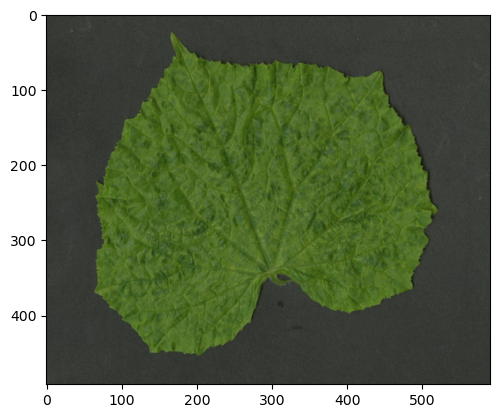

In [11]:
plt.imshow(img2rgb(img_orig))

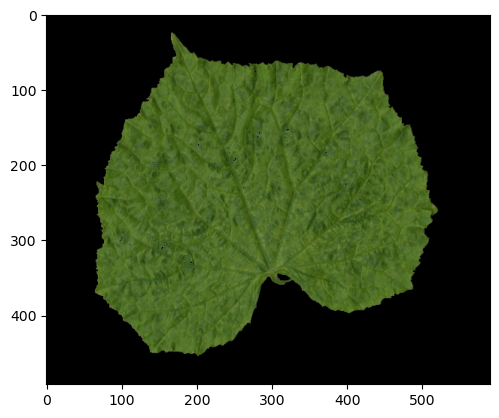

In [12]:
plt.imshow(img2rgb(masked_blur_img))

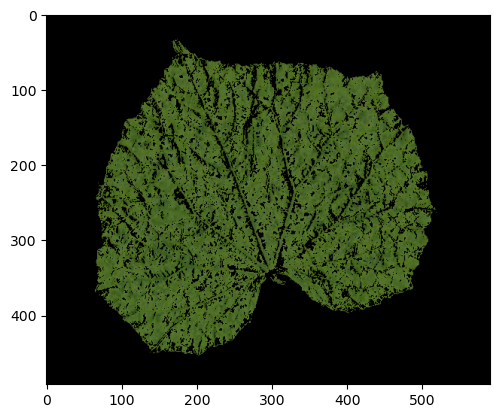

In [13]:
plt.imshow(img2rgb(pathogen_img))

In [14]:
d0 = masked_blur_img.shape[0]*masked_blur_img.shape[1]
masked_blur_img_flatten = masked_blur_img.reshape(d0,masked_blur_img.shape[2])
masked_blur_img_flatten_nonzero = masked_blur_img_flatten[masked_blur_img_flatten!= [0,0,0]]

d = pathogen_img.shape[0]*pathogen_img.shape[1]
pathogen_img_flatten = pathogen_img.reshape(d,pathogen_img.shape[2])
pathogen_img_flatten_nonzero =pathogen_img_flatten[pathogen_img_flatten!= [0,0,0]] 

dr = len(masked_blur_img_flatten_nonzero)

nr = len(pathogen_img_flatten_nonzero)

ratio = (1 - nr/dr)
print(np.round(ratio*100,2))


21.29


Text(0.5, 1.0, 'Values Histogram')

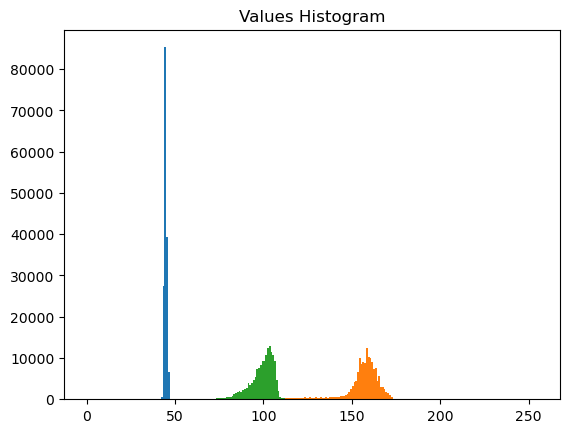

In [15]:
#Just for reference

plt.hist(final_hues_without0, bins = 180, range=[0, 180])
plt.title('Hues Histogram')

plt.hist(final_saturation_without0, bins = 255, range=[0, 255])
plt.title('Saturation Histogram')

plt.hist(final_value_without0, bins = 255, range=[0, 255])
plt.title('Values Histogram')